# Quantile Regression

[scikit-learn](http://scikit-learn.org/stable/) does not have a quantile regression. [mlinsights](http://www.xavierdupre.fr/app/mlinsights/helpsphinx/index.html) implements a version of it.

In [1]:
%matplotlib inline

We generate some dummy data.

In [2]:
import numpy
X = numpy.random.random(1000)
eps1 = (numpy.random.random(900) - 0.5) * 0.1
eps2 = (numpy.random.random(100)) * 10
eps = numpy.hstack([eps1, eps2])
X = X.reshape((1000, 1))
Y = X.ravel() * 3.4 + 5.6 + eps

In [3]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [4]:
from mlinsights.mlmodel import QuantileLinearRegression
clq = QuantileLinearRegression()
clq.fit(X, Y)

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=10, n_jobs=1, normalize=False, verbose=False)

In [5]:
from pandas import DataFrame
data= dict(X=X.ravel(), Y=Y, clr=clr.predict(X), clq=clq.predict(X))
df = DataFrame(data)
df.head()

,X,Y,clq,clr
0,0.132058,6.067375,6.042301,6.497819
1,0.397055,6.969955,7.010706,7.458096
2,0.782989,8.246861,8.421062,8.856614
3,0.769349,8.199289,8.371214,8.807184
4,0.262938,6.522105,6.520589,6.972093


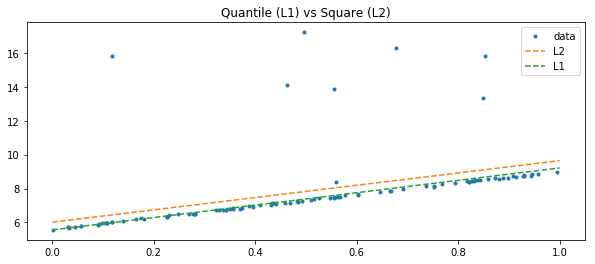

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
choice = numpy.random.choice(X.shape[0]-1, size=100)
xx = X.ravel()[choice]
yy = Y[choice]
ax.plot(xx, yy, '.', label="data")
xx = numpy.array([[0], [1]])
y1 = clr.predict(xx)
y2 = clq.predict(xx)
ax.plot(xx, y1, "--", label="L2")
ax.plot(xx, y2, "--", label="L1")
ax.set_title("Quantile (L1) vs Square (L2)");
ax.legend();

The L1 is clearly less sensible to extremas. The optimization algorithm is based on [Iteratively reweighted least squares](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares). It estimates a linear regression with error L2 then reweights each oberservation with the inverse of the error L1.

In [7]:
clq = QuantileLinearRegression(verbose=True, max_iter=20)
clq.fit(X, Y)

[QuantileLinearRegression.fit] iter=1 error=959.7982325811206
[QuantileLinearRegression.fit] iter=2 error=613.4934600959006
[QuantileLinearRegression.fit] iter=3 error=611.2255839016267
[QuantileLinearRegression.fit] iter=4 error=610.9695637201015
[QuantileLinearRegression.fit] iter=5 error=610.9497676465978
[QuantileLinearRegression.fit] iter=6 error=610.9557011521488
[QuantileLinearRegression.fit] iter=7 error=610.967936953012
[QuantileLinearRegression.fit] iter=8 error=610.9815724234766
[QuantileLinearRegression.fit] iter=9 error=610.9906327030461
[QuantileLinearRegression.fit] iter=10 error=610.9944838537251
[QuantileLinearRegression.fit] iter=11 error=610.9963192451546
[QuantileLinearRegression.fit] iter=12 error=610.9972107283894
[QuantileLinearRegression.fit] iter=13 error=610.9976434788733
[QuantileLinearRegression.fit] iter=14 error=610.9978529195498
[QuantileLinearRegression.fit] iter=15 error=610.9979540655008
[QuantileLinearRegression.fit] iter=16 error=610.9980028521679
[Q

QuantileLinearRegression(copy_X=True, delta=0.0001, fit_intercept=True,
             max_iter=20, n_jobs=1, normalize=False, verbose=True)